## Classification of Iris Species

### Problem Statement:

Fisher’s Iris data base (Fisher, 1936) is perhaps the best knowndatabase to be found in the pattern recognition literature. The dataset contains 3 classes of 50 instances each, where each class refersto a type of iris plant. One class is linearly separable from the othertwo; the latter are not linearly separable from each other.
The data base contains the following attributes:
1). sepal length in cm
2). sepal width in cm
3). petal length in cm
4). petal width in cm
5). class:
- Iris Setosa
- Iris Versicolour
- Iris Virginica
The goal of this project to classify the Iris species using machine learning algorithm(s).

#### Loading Packages

In [1]:
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import classification_report
import requests, json

In [2]:
# check current working directory
import os
os.getcwd()

'C:\\Users\\Nitish'

In [3]:
#Load data
data=pd.read_csv("Iris.csv")

In [4]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Check features present in the train data
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#Print data types for each variable
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

We can see there are three format of data types in the the dataset:

object: Object format means variables are categorical. Categorical variables in our dataset is Species i.e. target variable.

int64: It represents the integer variables. Id is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm.

In [7]:
# Look at the shape of the datset
data.shape

(150, 6)

We have 150 rows and 6 columns in the dataset

In [8]:
#Let's check the information of dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Here we can see that there is no null value in our dataset

In [9]:
#describe the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Here we can see the all statistical significance of the data 

### Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

#### Target variable

We will look at the target variable, i.e., Species. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number
data['Species'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

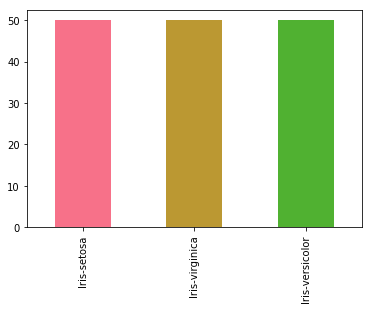

In [12]:
data['Species'].value_counts().plot.bar()

Here we can see that all species have equal numbers of sample

Let's visualize the independet variables 

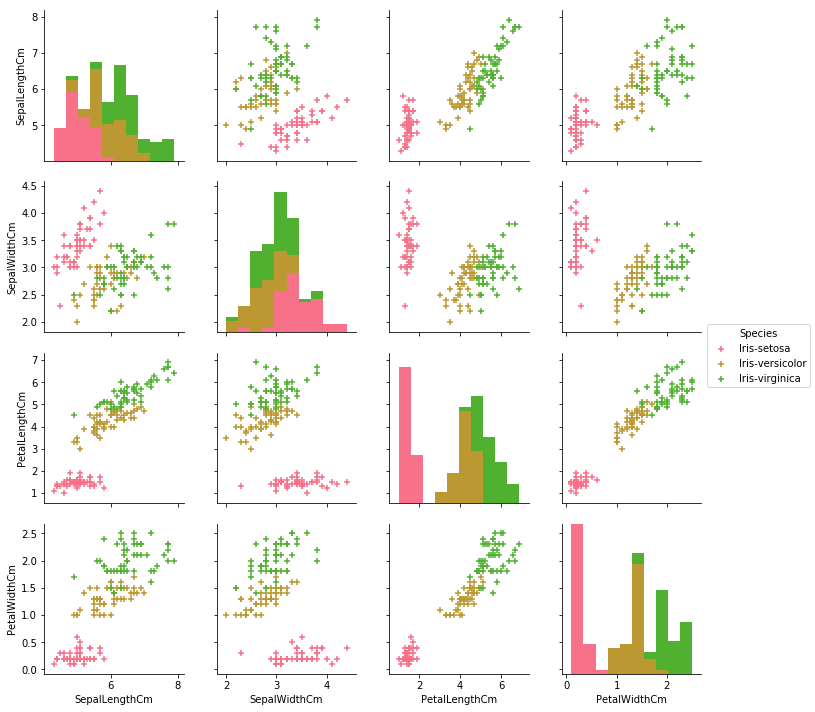

In [13]:
tmp = data.drop('Id', axis=1) #Droping ID Variable
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

1. After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in    pink) is distinctly different from those of the other two species.
2. There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica        (green).

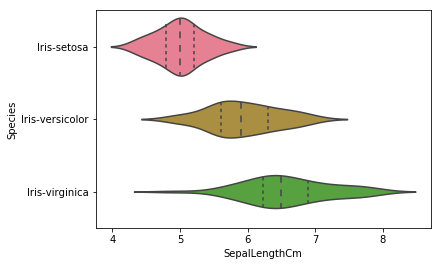

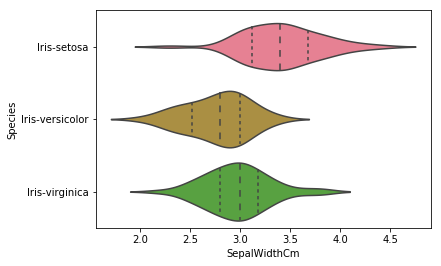

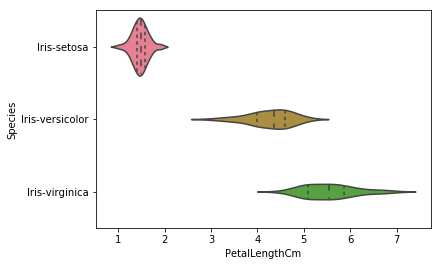

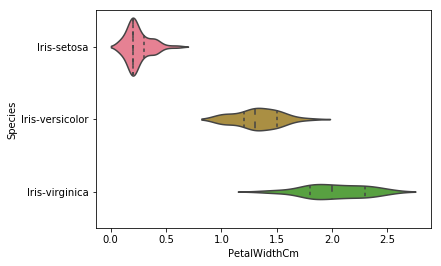

In [14]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

Above plots show that how features value vary for different different species.

### Evaluation Metrics for Classification Problems

The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using Accuracy metric:

##### Accuracy = True Positives + True Negatives /(True Positives + True Negatives + False Positives + False Negatives)¶

### Model Building

#### Let us make our first model with Random Forest

Lets drop the Loan_ID variable as it does not have any effect on the Loan_Status.

In [15]:
x=data.drop("Id",axis=1)

We are going to use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [16]:
y=x.Species
x = x.drop('Species',axis=1)

#### Dividing training dataset in two parts: Training dataset and Validation dataset

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)

The dataset has been divided into training and validation part. Let us import RandomForestClassifier and accuracy_score from sklearn and fit the logistic regression model.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [20]:
# A simple random forest classifier # A sim 
rfc = RandomForestClassifier(n_estimators=100,n_jobs=2)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
# Model accuracy and performance 
print ("Accuracy = %0.2f" % accuracy_score(y_cv, rfc.predict(x_cv)) )
print (classification_report(y_cv, rfc.predict(x_cv)))

Accuracy = 0.96
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.88      0.94        17

    avg / total       0.96      0.96      0.96        45



So our predictions are almost 96% accurate, i.e. we have identified 96% of the correct Iris Species.

#### Since this dataset has very small data, So Instead of creating validation set, we can also make use of cross validation to validate our predictions.

#### Random Forest using stratified k-folds cross validation¶

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

1. The validation set approach
2. k-fold cross validation
3. Leave one out cross validation (LOOCV)
4. Stratified k-fold cross validation

#### Let us understand how stratified k-fold cross validation works:¶

Let us understand how stratified k-fold cross validation works:

1. Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
2. For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data    such that in every fold, each class comprises of about half the instances.
3. It is generally a better approach when dealing with both bias and variance.
4. A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class      imbalance.


#### Let’s import StratifiedKFold from sklearn and fit the model.

In [22]:
from sklearn.model_selection import StratifiedKFold

Now let’s make a cross validation Random Forest model with stratified 5 folds and make predictions for test dataset.

In [23]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     x_train,x_cv = x.loc[train_index],x.loc[test_index]
     y_train,y_cv = y[train_index],y[test_index]
    
     rfc = RandomForestClassifier(random_state=1, max_depth=10)
     rfc.fit(x_train, y_train)
     pred_test = rfc.predict(x_cv)
     score = accuracy_score(y_cv,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.9333333333333333

2 of kfold 5
accuracy_score 0.9666666666666667

3 of kfold 5
accuracy_score 0.9666666666666667

4 of kfold 5
accuracy_score 0.9

5 of kfold 5
accuracy_score 1.0


The mean validation accuracy for this model turns out to be 0.95. That means this model is not overfitting the training data.

### Grid Search

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [26]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3, random_state=1)

In [28]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=161, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 161. Now let’s build the model using these optimized values.

In [30]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = x.loc[train_index],x.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.9666666666666667

2 of kfold 5
accuracy_score 0.9666666666666667

3 of kfold 5
accuracy_score 0.9666666666666667

4 of kfold 5
accuracy_score 0.9

5 of kfold 5
accuracy_score 1.0


The mean validation accuracy for this model is 0.96

### Feature Importance

Let us find the feature importance now, i.e. which features are most important for this problem. We will use featureimportances attribute of sklearn to do so.

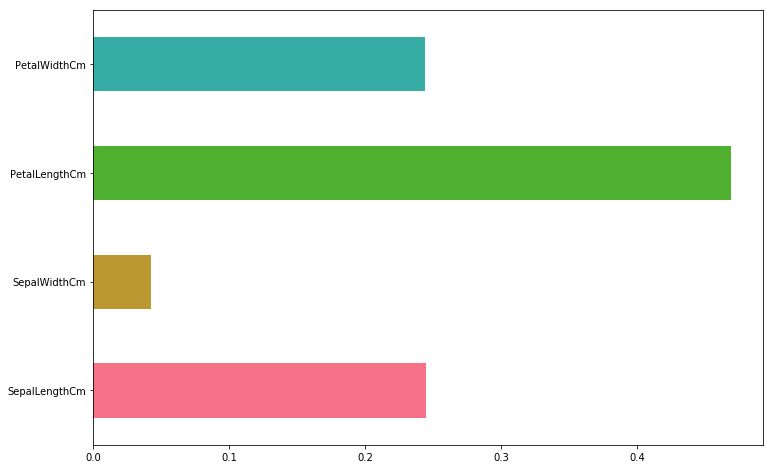

In [31]:
importances=pd.Series(rfc.feature_importances_, index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

We can see that PetalLengthCm is the most important feature and SepalWidthCm is least important feature.

#### XGBoost

It’s a boosting algorithm. It is a fast and efficient algorithm and has been used by the winners of many data science competitions

In [32]:
from xgboost import XGBClassifier

In [33]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = x.loc[train_index],x.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.9666666666666667

2 of kfold 5
accuracy_score 0.9666666666666667

3 of kfold 5
accuracy_score 0.9666666666666667

4 of kfold 5
accuracy_score 0.9333333333333333

5 of kfold 5
accuracy_score 1.0


C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

The mean validation accuracy for this model is 0.96.

### Model serialization / marshalling

Well here we are going to use pickle to save the trained model in the disk for later use. The reason why using this is just to avoid training the model every time we wanna use it, so we train it once, save it then open it many times.

In [34]:
#import pickle

#### Model Persistence with Pickle

In [35]:
# Save the model into disk 
#pickle.dump(rfc, open("rfc.pkl","wb"))

In [36]:
# Load the random forest model back 
#random_forest = pickle.load(open("rfc.pkl","rb"))

In [37]:
# Use it 
#print (classification_report(y_test,random_forest.predict(x_test)))

#### Model Persistence with Scikit-Learn

In [38]:
#from sklearn.externals import joblib

#joblib.dump(rfc, "RandomForest.pkl")

#### Deployment using Flask

In [39]:
#import requests
#BASE_URL="http://127.0.0.1:5000"
#data = json.dumps({'sl':5.84,'sw':3.0,'pl':3.75,'pw':1.1})
#data={'sl':5.84,'sw':3.0,'pl':3.75,'pw':1.1}
#response = requests.post("{}/predict".format(BASE_URL), json = data)

#response.json()